In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn')

C:\Users\ferra\AppData\Local\Temp\ipykernel_46604\1205794566.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
msft = yf.Ticker('msft')

In [3]:
stockinfo = msft.info
for key,value in stockinfo.items():
    print(key, ':', value)

address1 : One Microsoft Way
city : Redmond
state : WA
zip : 98052-6399
country : United States
phone : 425 882 8080
website : https://www.microsoft.com
industry : Software - Infrastructure
industryKey : software-infrastructure
industryDisp : Software - Infrastructure
sector : Technology
sectorKey : technology
sectorDisp : Technology
longBusinessSummary : Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. 

In [4]:
empleados = msft.info['fullTimeEmployees']
print(empleados)

221000


In [5]:
print(msft.institutional_holders)

  Date Reported                             Holder  pctHeld     Shares  \
0    2023-06-30                 Vanguard Group Inc   0.0879  653247546   
1    2023-06-30                     Blackrock Inc.   0.0722  536245027   
2    2023-06-30           State Street Corporation   0.0395  293614078   
3    2023-06-30                           FMR, LLC   0.0283  210111250   
4    2023-06-30      Price (T.Rowe) Associates Inc   0.0215  159904219   
5    2023-06-30      Geode Capital Management, LLC   0.0199  148129470   
6    2023-06-30                     Morgan Stanley   0.0166  123498322   
7    2023-06-30          JP Morgan Chase & Company   0.0152  113024837   
8    2022-12-31  Norges Bank Investment Management   0.0116   86316926   
9    2023-06-30            Capital World Investors   0.0115   85507261   

          Value  
0  222456919314  
1  182612881494  
2   99987338122  
3   71551285075  
4   54453782738  
5   50444009713  
6   42056118573  
7   38489477991  
8   20700525193  
9   2

In [6]:
df = msft.dividends
data = df.resample('Y').sum()
data = data.reset_index()
data['Year']  = data['Date'].dt.year
data

,Date,Dividends,Year
0,2003-12-31 00:00:00-05:00,0.24,2003
1,2004-12-31 00:00:00-05:00,3.16,2004
2,2005-12-31 00:00:00-05:00,0.32,2005
3,2006-12-31 00:00:00-05:00,0.37,2006
4,2007-12-31 00:00:00-05:00,0.41,2007
5,2008-12-31 00:00:00-05:00,0.46,2008
6,2009-12-31 00:00:00-05:00,0.52,2009
7,2010-12-31 00:00:00-05:00,0.55,2010
8,2011-12-31 00:00:00-05:00,0.68,2011
9,2012-12-31 00:00:00-05:00,0.83,2012


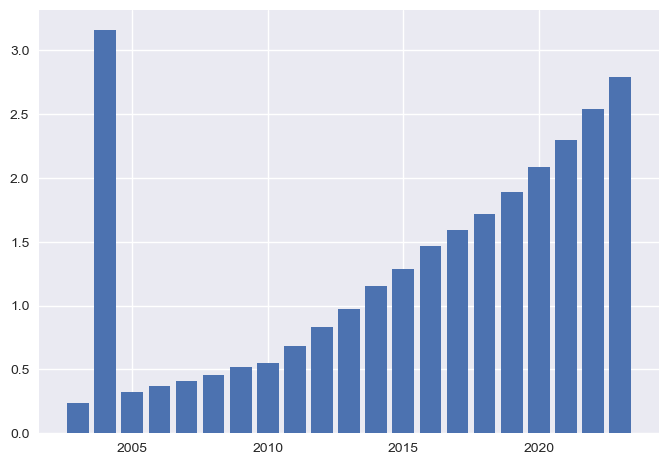

In [7]:
plt.figure()
plt.bar(data['Year'],data['Dividends'])
plt.show()

In [8]:
calendar = msft.calendar
df_eventos = pd.DataFrame(calendar)
df_eventos

,Dividend Date,Ex-Dividend Date,Earnings Date,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average
0,2024-03-14,2024-02-14,2024-01-30,3.05,2.5,2.56,56805200000,55913800000,56151900000


# Options

In [9]:
msft.options

('2024-02-02',
 '2024-02-09',
 '2024-02-16',
 '2024-02-23',
 '2024-03-01',
 '2024-03-15',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

In [10]:
expiration_date = msft.options[6]
print(expiration_date)

2024-04-19


In [26]:
opciones = msft.option_chain(expiration_date)
#print(opciones)

In [12]:
opciones.calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     64 non-null     object             
 1   lastTradeDate      64 non-null     datetime64[ns, UTC]
 2   strike             64 non-null     float64            
 3   lastPrice          64 non-null     float64            
 4   bid                64 non-null     float64            
 5   ask                64 non-null     float64            
 6   change             64 non-null     float64            
 7   percentChange      64 non-null     float64            
 8   volume             61 non-null     float64            
 9   openInterest       64 non-null     int64              
 10  impliedVolatility  64 non-null     float64            
 11  inTheMoney         64 non-null     bool               
 12  contractSize       64 non-null     object           

In [13]:
# ATENCIÓ MIREM NOMÉS LA VOLATILITAT DE LES CALLS
Opcionesdf = opciones.puts

In [14]:
# Convert 'lastTradeDate' column to string type
Opcionesdf['lastTradeDate'] = Opcionesdf['lastTradeDate'].astype(str)

# Split 'lastTradeDate' into 'date' and 'hour' columns
Opcionesdf[['date', 'hour']] = Opcionesdf['lastTradeDate'].str.split(' ', expand=True)
Opcionesdf.head(30)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,hour
0,MSFT240419P00160000,2024-01-24 20:47:04+00:00,160.0,0.01,0.00,0.03,0.00,0.000000,6,63,0.609379,False,REGULAR,USD,2024-01-24,20:47:04+00:00
1,MSFT240419P00165000,2024-01-24 20:46:48+00:00,165.0,0.02,0.00,0.03,0.00,0.000000,10,15,0.585942,False,REGULAR,USD,2024-01-24,20:46:48+00:00
2,MSFT240419P00170000,2024-01-24 20:46:37+00:00,170.0,0.02,0.00,0.03,0.00,0.000000,8,50,0.570317,False,REGULAR,USD,2024-01-24,20:46:37+00:00
3,MSFT240419P00175000,2024-01-24 20:46:26+00:00,175.0,0.02,0.03,0.03,0.00,0.000000,4,19,0.585942,False,REGULAR,USD,2024-01-24,20:46:26+00:00
4,MSFT240419P00180000,2024-01-25 18:01:52+00:00,180.0,0.01,0.00,0.03,0.00,0.000000,1,119,0.531255,False,REGULAR,USD,2024-01-25,18:01:52+00:00
5,MSFT240419P00185000,2024-01-24 20:48:13+00:00,185.0,0.03,0.00,0.03,0.00,0.000000,13,116,0.515630,False,REGULAR,USD,2024-01-24,20:48:13+00:00
6,MSFT240419P00190000,2024-01-24 20:48:49+00:00,190.0,0.03,0.00,0.04,0.00,0.000000,12,41,0.511724,False,REGULAR,USD,2024-01-24,20:48:49+00:00
7,MSFT240419P00195000,2024-01-24 20:50:22+00:00,195.0,0.04,0.00,0.04,0.00,0.000000,15,1084,0.525395,False,REGULAR,USD,2024-01-24,20:50:22+00:00
8,MSFT240419P00200000,2024-01-24 20:50:46+00:00,200.0,0.03,0.01,0.04,0.00,0.000000,49,150,0.507817,False,REGULAR,USD,2024-01-24,20:50:46+00:00
9,MSFT240419P00205000,2024-01-26 20:30:45+00:00,205.0,0.03,0.01,0.05,-0.01,-25.000000,2,118,0.501958,False,REGULAR,USD,2024-01-26,20:30:45+00:00


In [15]:
from datetime import datetime, timedelta
import pandas as pd

# Suponiendo que tienes una columna 'date' en tu DataFrame
# Suponiendo también que tienes la variable yesterday_date definida

# Calcula la fecha de hace dos días
two_days_ago = datetime.today() - timedelta(days=2)
two_days_ago = two_days_ago.date()

# Crea una columna desfasada basada en la condición
Opcionesdf['desfasada'] = (two_days_ago > pd.to_datetime(Opcionesdf['date']).dt.date)

# Muestra el DataFrame resultante
Opcionesdf.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,hour,desfasada
0,MSFT240419P00160000,2024-01-24 20:47:04+00:00,160.0,0.01,0.00,0.03,0.0,0.0,6,63,0.609379,False,REGULAR,USD,2024-01-24,20:47:04+00:00,True
1,MSFT240419P00165000,2024-01-24 20:46:48+00:00,165.0,0.02,0.00,0.03,0.0,0.0,10,15,0.585942,False,REGULAR,USD,2024-01-24,20:46:48+00:00,True
2,MSFT240419P00170000,2024-01-24 20:46:37+00:00,170.0,0.02,0.00,0.03,0.0,0.0,8,50,0.570317,False,REGULAR,USD,2024-01-24,20:46:37+00:00,True
3,MSFT240419P00175000,2024-01-24 20:46:26+00:00,175.0,0.02,0.03,0.03,0.0,0.0,4,19,0.585942,False,REGULAR,USD,2024-01-24,20:46:26+00:00,True
4,MSFT240419P00180000,2024-01-25 18:01:52+00:00,180.0,0.01,0.00,0.03,0.0,0.0,1,119,0.531255,False,REGULAR,USD,2024-01-25,18:01:52+00:00,False


In [16]:
Opcionesdf = Opcionesdf[Opcionesdf['desfasada'] != True]
Opcionesdf.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,hour,desfasada
4,MSFT240419P00180000,2024-01-25 18:01:52+00:00,180.0,0.01,0.00,0.03,0.00,0.0,1,119,0.531255,False,REGULAR,USD,2024-01-25,18:01:52+00:00,False
9,MSFT240419P00205000,2024-01-26 20:30:45+00:00,205.0,0.03,0.01,0.05,-0.01,-25.0,2,118,0.501958,False,REGULAR,USD,2024-01-26,20:30:45+00:00,False
10,MSFT240419P00210000,2024-01-25 18:57:38+00:00,210.0,0.04,0.02,0.05,0.00,0.0,69,364,0.486333,False,REGULAR,USD,2024-01-25,18:57:38+00:00,False
11,MSFT240419P00215000,2024-01-25 18:12:35+00:00,215.0,0.05,0.02,0.06,0.00,0.0,1012,668,0.477544,False,REGULAR,USD,2024-01-25,18:12:35+00:00,False
12,MSFT240419P00220000,2024-01-25 18:11:27+00:00,220.0,0.06,0.04,0.07,0.00,0.0,9,1007,0.468755,False,REGULAR,USD,2024-01-25,18:11:27+00:00,False


In [17]:
Opcionesdf.query('impliedVolatility > 0.786135')

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,hour,desfasada


In [18]:
df = Opcionesdf[['strike', 'lastPrice', 'impliedVolatility']]
df.head(50)

,strike,lastPrice,impliedVolatility
4,180.0,0.01,0.531255
9,205.0,0.03,0.501958
10,210.0,0.04,0.486333
11,215.0,0.05,0.477544
12,220.0,0.06,0.468755
13,225.0,0.06,0.453130
14,230.0,0.07,0.443365
15,235.0,0.08,0.432623
16,240.0,0.09,0.421881
17,245.0,0.11,0.415045


In [19]:
from datetime import datetime, timedelta
today = datetime.today()

# Calculate yesterday's date
yesterday = today - timedelta(days=1)

# Format the date as a string
yesterday_date = yesterday.strftime('%Y-%m-%d')

print("Yesterday's date:", yesterday_date)
# Get the current price
current_price = msft.history(period='1d')['Close'][0]
current_price = current_price.round(2)

print(f"Current price for {msft}: {current_price}")

Yesterday's date: 2024-01-26
Current price for yfinance.Ticker object <MSFT>: 403.93


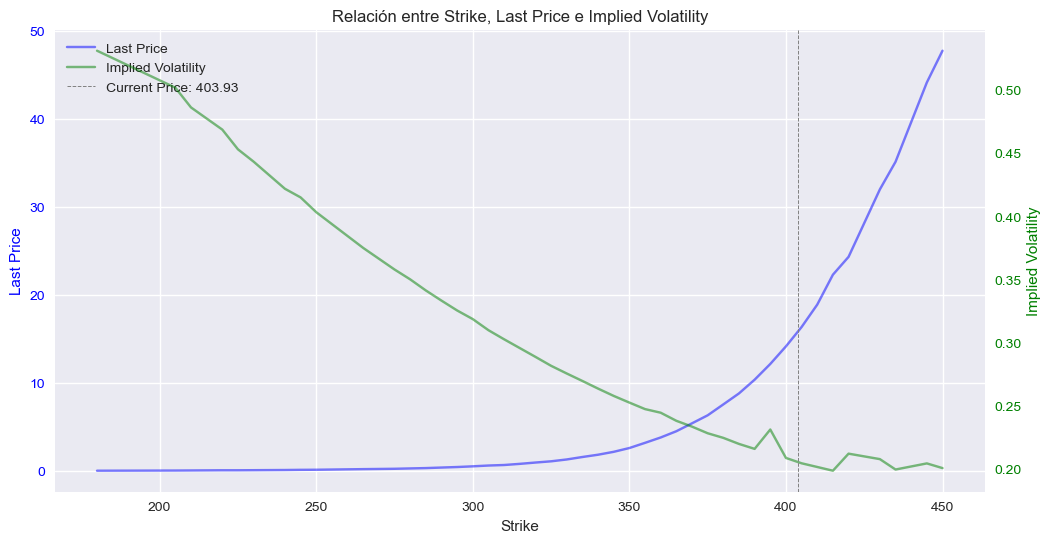

In [20]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado Opcionesdf con las columnas 'strike', 'lastPrice' y 'impliedVolatility'
# Supongamos que también tienes definida la variable current_price

# Extraer las columnas 'strike', 'lastPrice' y 'impliedVolatility'
strike = Opcionesdf['strike']
lastPrice = Opcionesdf['lastPrice']
impliedVolatility = Opcionesdf['impliedVolatility']

# Crear el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(12, 6))

# Línea para lastPrice (eje y izquierdo)
ax1.plot(strike, lastPrice, color='blue', alpha=0.5, label='Last Price')
ax1.set_xlabel('Strike')
ax1.set_ylabel('Last Price', color='blue')
ax1.tick_params('y', colors='blue')

# Crear eje y derecho para impliedVolatility
ax2 = ax1.twinx()
ax2.plot(strike, impliedVolatility, color='green', alpha=0.5, label='Implied Volatility')
ax2.set_ylabel('Implied Volatility', color='green')
ax2.tick_params('y', colors='green')

plt.axvline(x=current_price, color='gray', linestyle='--', linewidth=0.7, label=f'Current Price: {current_price}')

# Etiqueta y título
plt.title('Relación entre Strike, Last Price e Implied Volatility')

# Agregar leyendas
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Mostrar el gráfico
plt.grid(False)
plt.show()


In [21]:
opt = msft.option_chain(date='2024-03-15')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240315P00140000,2024-01-26 15:19:16+00:00,140.0,0.01,0.00,0.01,0.000000,0.000000,1,285,0.843752,False,REGULAR,USD
1,MSFT240315P00145000,2024-01-22 14:37:14+00:00,145.0,0.01,0.00,0.01,0.000000,0.000000,91,548,0.812502,False,REGULAR,USD
2,MSFT240315P00150000,2024-01-26 18:45:23+00:00,150.0,0.01,0.00,0.02,-0.030000,-75.000000,3,1687,0.828127,False,REGULAR,USD
3,MSFT240315P00155000,2024-01-24 15:58:32+00:00,155.0,0.01,0.00,0.02,0.000000,0.000000,20,914,0.796877,False,REGULAR,USD
4,MSFT240315P00160000,2024-01-24 17:01:16+00:00,160.0,0.01,0.00,0.02,0.000000,0.000000,3,381,0.773440,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MSFT240315P00520000,2024-01-26 20:08:27+00:00,520.0,116.13,114.40,117.90,-6.940002,-5.639069,2,1,0.439215,True,REGULAR,USD
76,MSFT240315P00525000,2024-01-22 20:50:55+00:00,525.0,128.10,119.35,122.75,0.000000,0.000000,1,0,0.443792,True,REGULAR,USD
77,MSFT240315P00530000,2024-01-26 20:19:06+00:00,530.0,126.08,124.35,127.85,-21.009995,-14.283769,2,1,0.461553,True,REGULAR,USD
78,MSFT240315P00535000,2024-01-10 20:42:06+00:00,535.0,152.12,129.35,132.90,0.000000,0.000000,1,0,0.476446,True,REGULAR,USD
